In [8]:
# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Datos

In [6]:
url = 'https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
data = pd.read_csv(url)
df = data.copy()

In [7]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [16]:
df.tail()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [19]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rowid,344.0,NaN,NaN,NaN,172.5,99.448479,1.0,86.75,172.5,258.25,344.0
species,344,3,Adelie,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
island,344,3,Biscoe,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bill_length_mm,342.0,NaN,NaN,NaN,43.92193,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,NaN,NaN,NaN,17.15117,1.974793,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,342.0,NaN,NaN,NaN,200.915205,14.061714,172.0,190.0,197.0,213.0,231.0
body_mass_g,342.0,NaN,NaN,NaN,4201.754386,801.954536,2700.0,3550.0,4050.0,4750.0,6300.0
sex,333,2,male,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,344.0,NaN,NaN,NaN,2008.02907,0.818356,2007.0,2007.0,2008.0,2009.0,2009.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [18]:
df.isna().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

# Mini-EDA

<function matplotlib.pyplot.show(close=None, block=None)>

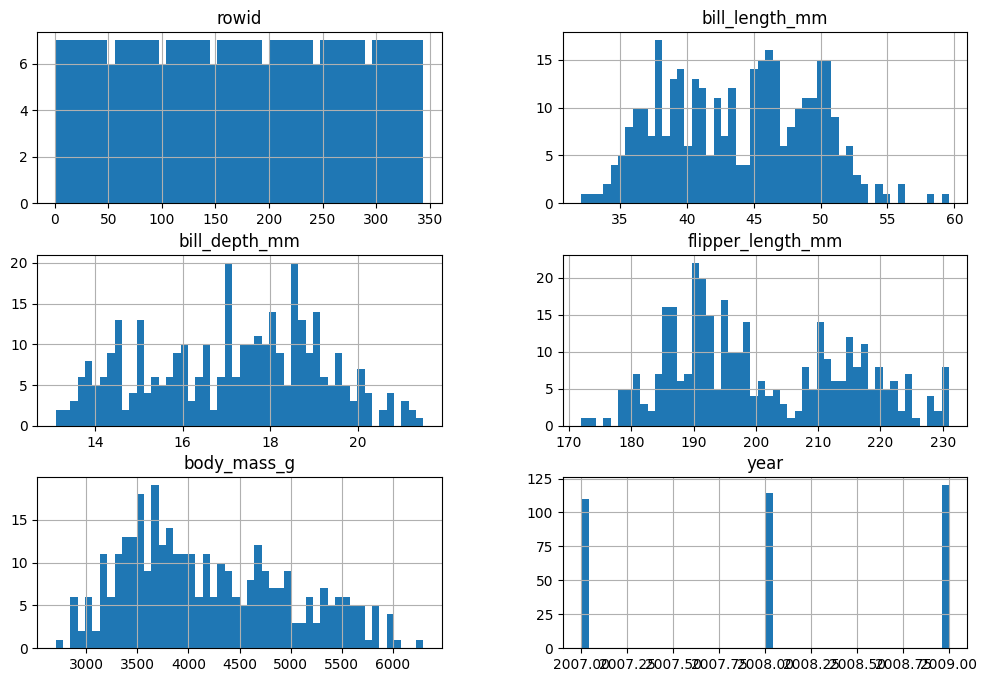

In [9]:
df.hist(bins=50, figsize=(12,8))
plt.show

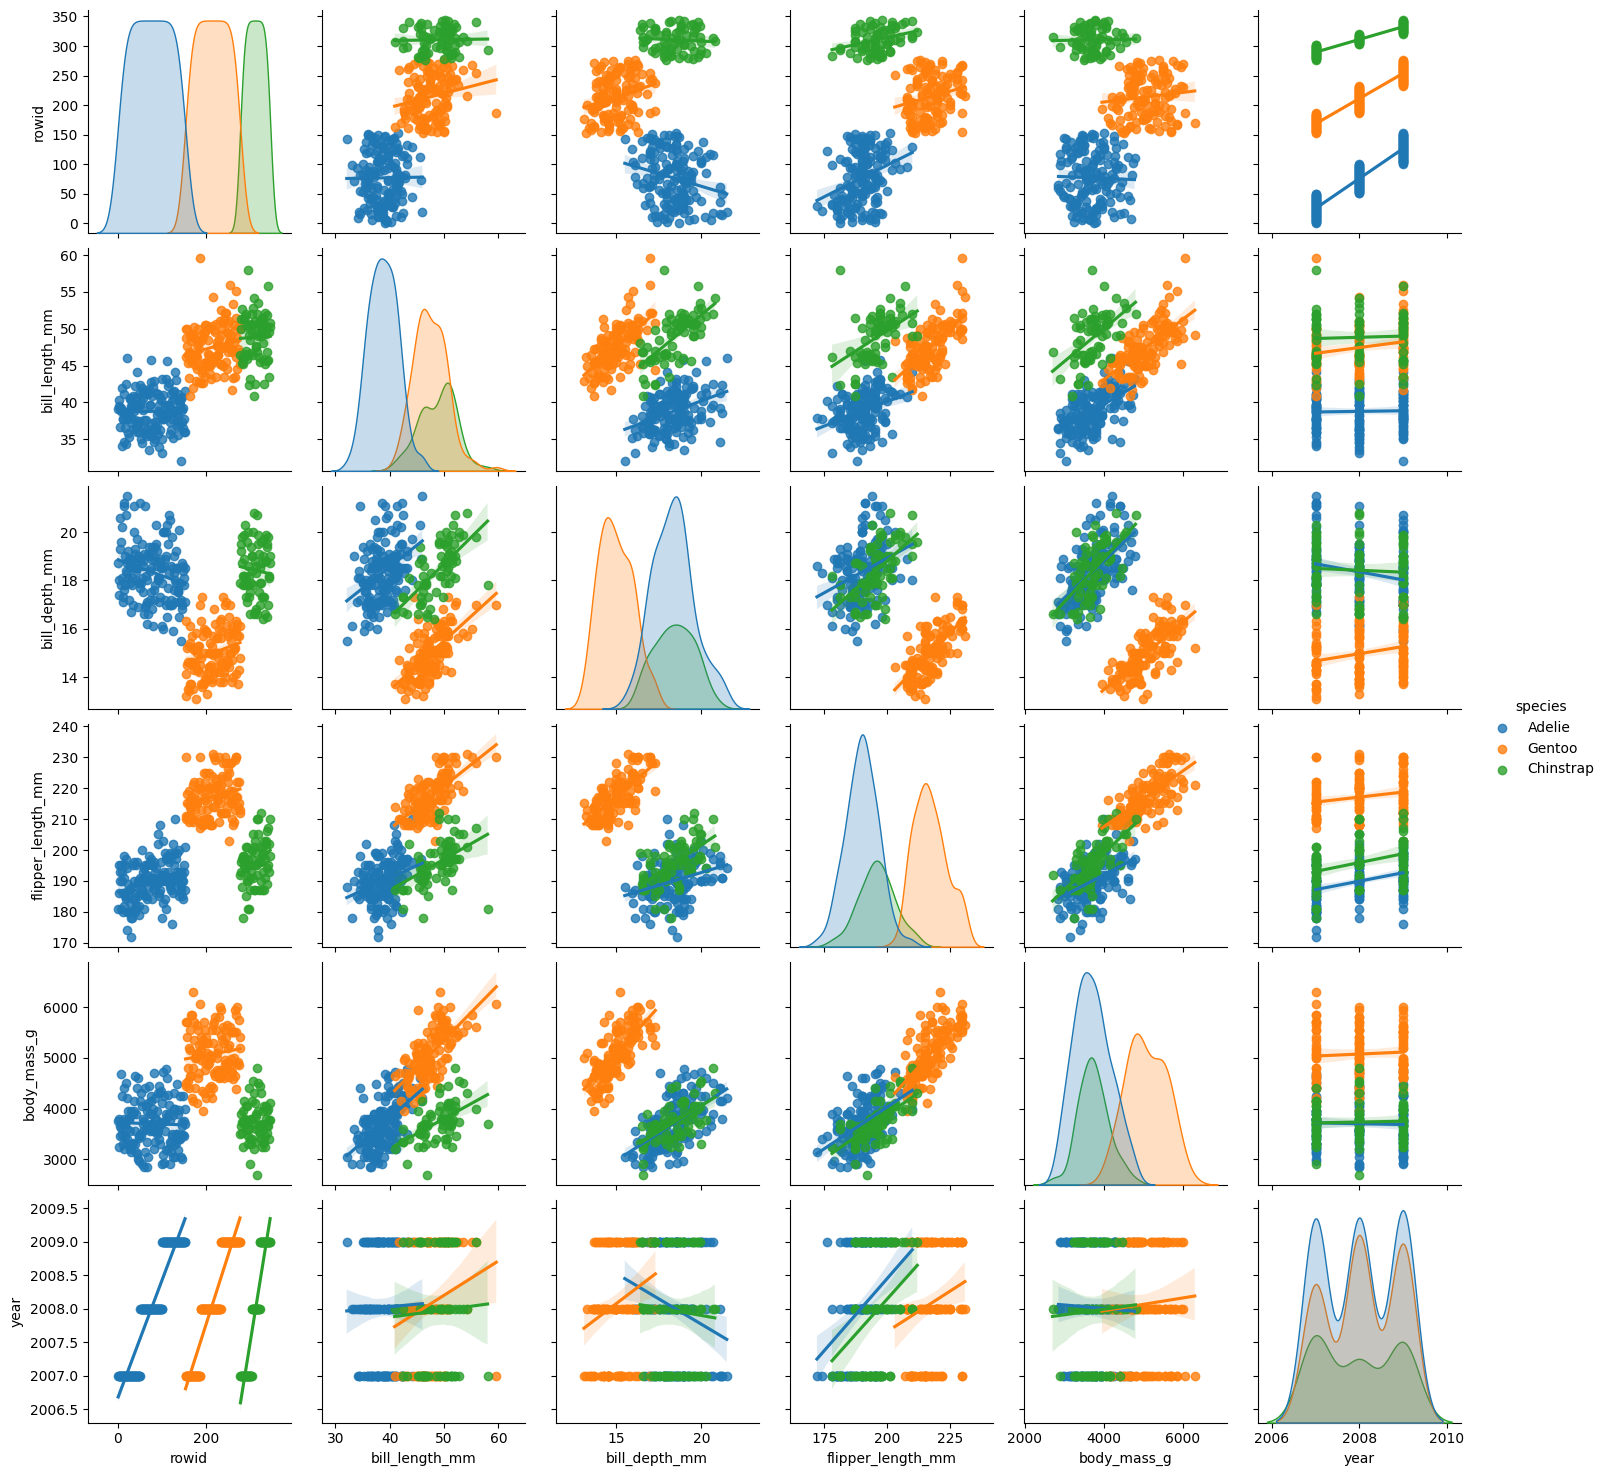

In [15]:
sns.pairplot(df, kind="reg", diag_kind="kde", hue='species')

<Axes: >

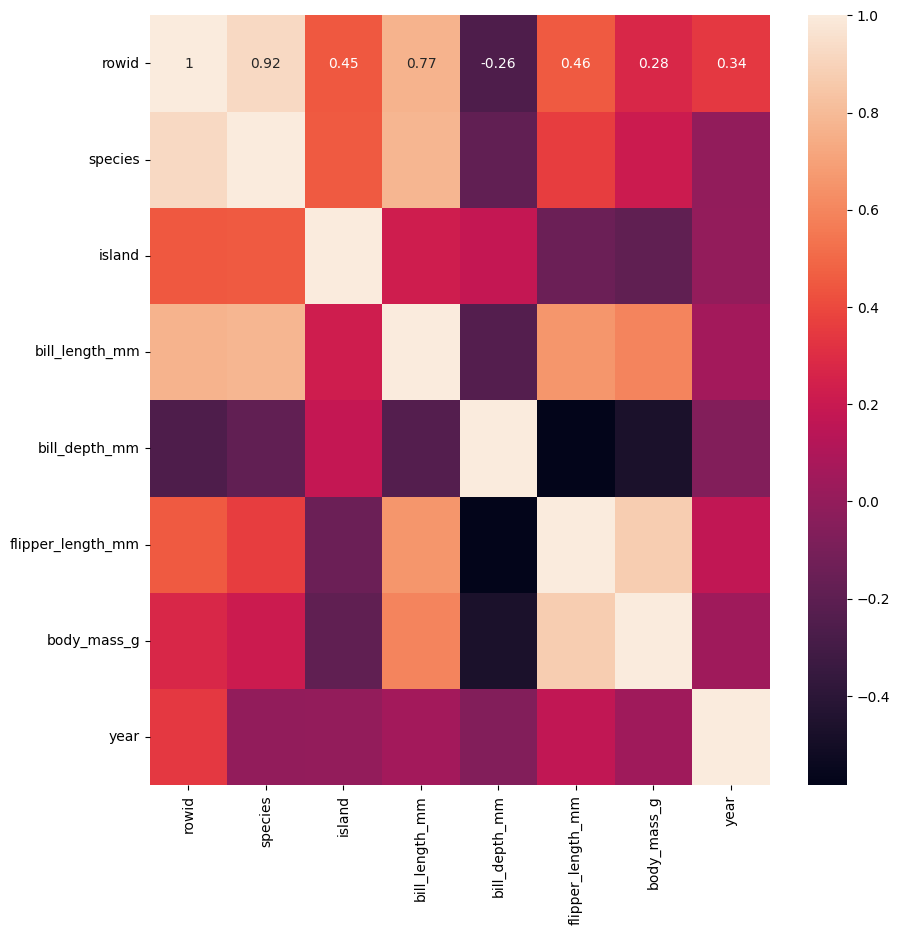

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.replace({'Adelie':0, 'Gentoo':1, 'Chinstrap':2, 'Torgersen':0, 'Biscoe':1, 'Dream':2}).corr(numeric_only=True), annot=True)

<Axes: xlabel='species', ylabel='count'>

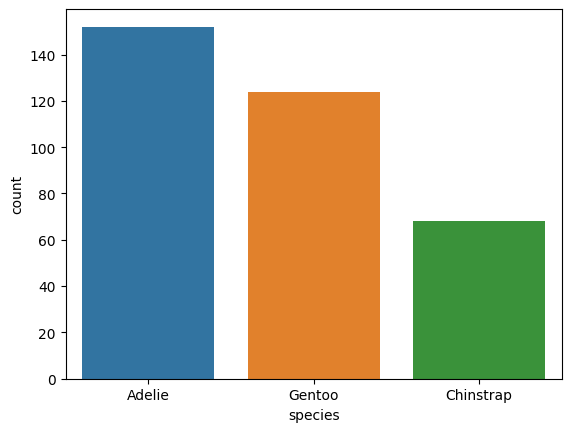

In [22]:
sns.countplot(x='species', data=df)

In [ ]:
sns.countplot(x='island', data=df)

# Tratamiento de Datos

In [41]:
df.isna().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [27]:
df.dtypes

rowid                  int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [39]:
media_1 = df['bill_length_mm'].mean()
media_2 = df['bill_depth_mm'].mean()
media_3 = df['flipper_length_mm'].mean()
media_4 = df['body_mass_g'].mean()
moda_1 = df['sex'].mode()[0]

In [40]:
df['bill_length_mm'] = df['bill_length_mm'].fillna(media_1)
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(media_2)
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(media_3)
df['body_mass_g'] = df['body_mass_g'].fillna(media_4)
df['sex'] = df['sex'].fillna(moda_1)

# Division de Datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

# Escalado

# BaseLine y Seleccion Modelo

# Prediccion

# Validar Modelo